In [1]:
import nlsy
import numpy as np
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
from scipy import stats
from pandas.plotting import scatter_matrix
sns.set(style="ticks", color_codes=True)
%matplotlib inline

NLSY_db = nlsy.NLSY_database("data.db")
(cohort_79, cohort_97) = NLSY_db.cohorts
#create a column to indicate which cohort each instance belongs to.
c79=cohort_79.data(impute_values=False)
c97=cohort_97.data(impute_values=False)
c79['cohort']=79
c97["cohort"]=97
#c79.reset_index(drop=True, inplace=True)
#c97.reset_index(drop=True, inplace=True)
merged_data=pd.concat([c79, c97])
merged_data.drop_duplicates(inplace=True)
#drop all negative responses and N/A
merged_data_1=merged_data[merged_data[merged_data.columns]>=0].dropna()

C:\Users\pqy94\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [2]:
#merged_data_1 = merged_data_1.loc[~merged_data_1.index.duplicated()]


In [3]:
original_variables=['adjusted_income', 'age',  'cohort', 'curr_pregnant',
       'family_size', 'gdp_growth', 'highest_grade', 
       'hours_worked_last_year', 'income_change', 'industry', 
       'inflation', 'marital_status', 'number_of_kids', 'occupation','prior_income',
       'race', 'region', 'regional_unemployment', 'sex', 'unemployment',
       'urban_or_rural', 'weeks_worked_last_year', 'work_amount_limited',
       'work_kind_limited', 'year','shock']
features=['adjusted_income', 'age',  'cohort', 'curr_pregnant',
       'family_size', 'gdp_growth', 'highest_grade', 
       'hours_worked_last_year', 'income_change', 'industry', 
       'inflation', 'marital_status', 'number_of_kids', 'occupation','prior_income',
       'race', 'region', 'regional_unemployment', 'sex', 'unemployment',
       'urban_or_rural', 'weeks_worked_last_year', 'work_amount_limited',
       'work_kind_limited', 'year']
Target=['shock']

# Exploratory Data Analysis

In [4]:
merged_data[original_variables].describe()
merged_data_1[original_variables].describe()

,adjusted_income,age,cohort,curr_pregnant,family_size,gdp_growth,highest_grade,hours_worked_last_year,income_change,industry,...,race,region,sex,unemployment,urban_or_rural,weeks_worked_last_year,work_amount_limited,work_kind_limited,year,shock
count,102751.000000,102751.000000,102751.0,102751.000000,102751.000000,102751.000000,102751.000000,102751.000000,102751.000000,102751.000000,...,102751.000000,102751.000000,102751.000000,102751.000000,102751.000000,102751.000000,102751.000000,102751.000000,102751.000000,102751.000000
mean,31201.543275,31.507012,79.0,0.002803,3.234791,0.034478,12.234869,1598.981762,1.044706,600.921899,...,2.360318,2.606223,1.532209,0.064325,0.785151,38.262119,0.060924,0.072486,1992.635692,0.209000
std,29333.444748,9.672841,0.0,0.052868,1.802347,0.014830,2.618632,1005.768638,1.733139,324.249096,...,0.764536,0.987653,0.498964,0.012842,0.410720,19.987281,0.239192,0.259292,9.366152,0.406597
min,0.000000,16.000000,79.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,1.000000,1.000000,1.000000,0.040000,0.000000,0.000000,0.000000,0.000000,1980.000000,0.000000
25%,6213.000000,24.000000,79.0,0.000000,2.000000,0.030000,12.000000,755.000000,0.000000,400.000000,...,2.000000,2.000000,1.000000,0.050000,1.000000,26.000000,0.000000,0.000000,1985.000000,0.000000
50%,26287.000000,29.000000,79.0,0.000000,3.000000,0.040000,12.000000,1980.000000,0.163555,700.000000,...,3.000000,3.000000,2.000000,0.060000,1.000000,52.000000,0.000000,0.000000,1990.000000,0.000000
75%,46521.500000,38.000000,79.0,0.000000,4.000000,0.040000,13.000000,2150.000000,0.952182,812.000000,...,3.000000,3.000000,2.000000,0.070000,1.000000,52.000000,0.000000,0.000000,2000.000000,0.000000
max,224588.000000,58.000000,79.0,1.000000,18.000000,0.070000,17.000000,8736.000000,5.000000,992.000000,...,3.000000,4.000000,2.000000,0.090000,1.000000,52.000000,1.000000,1.000000,2014.000000,1.000000


## Boxplot

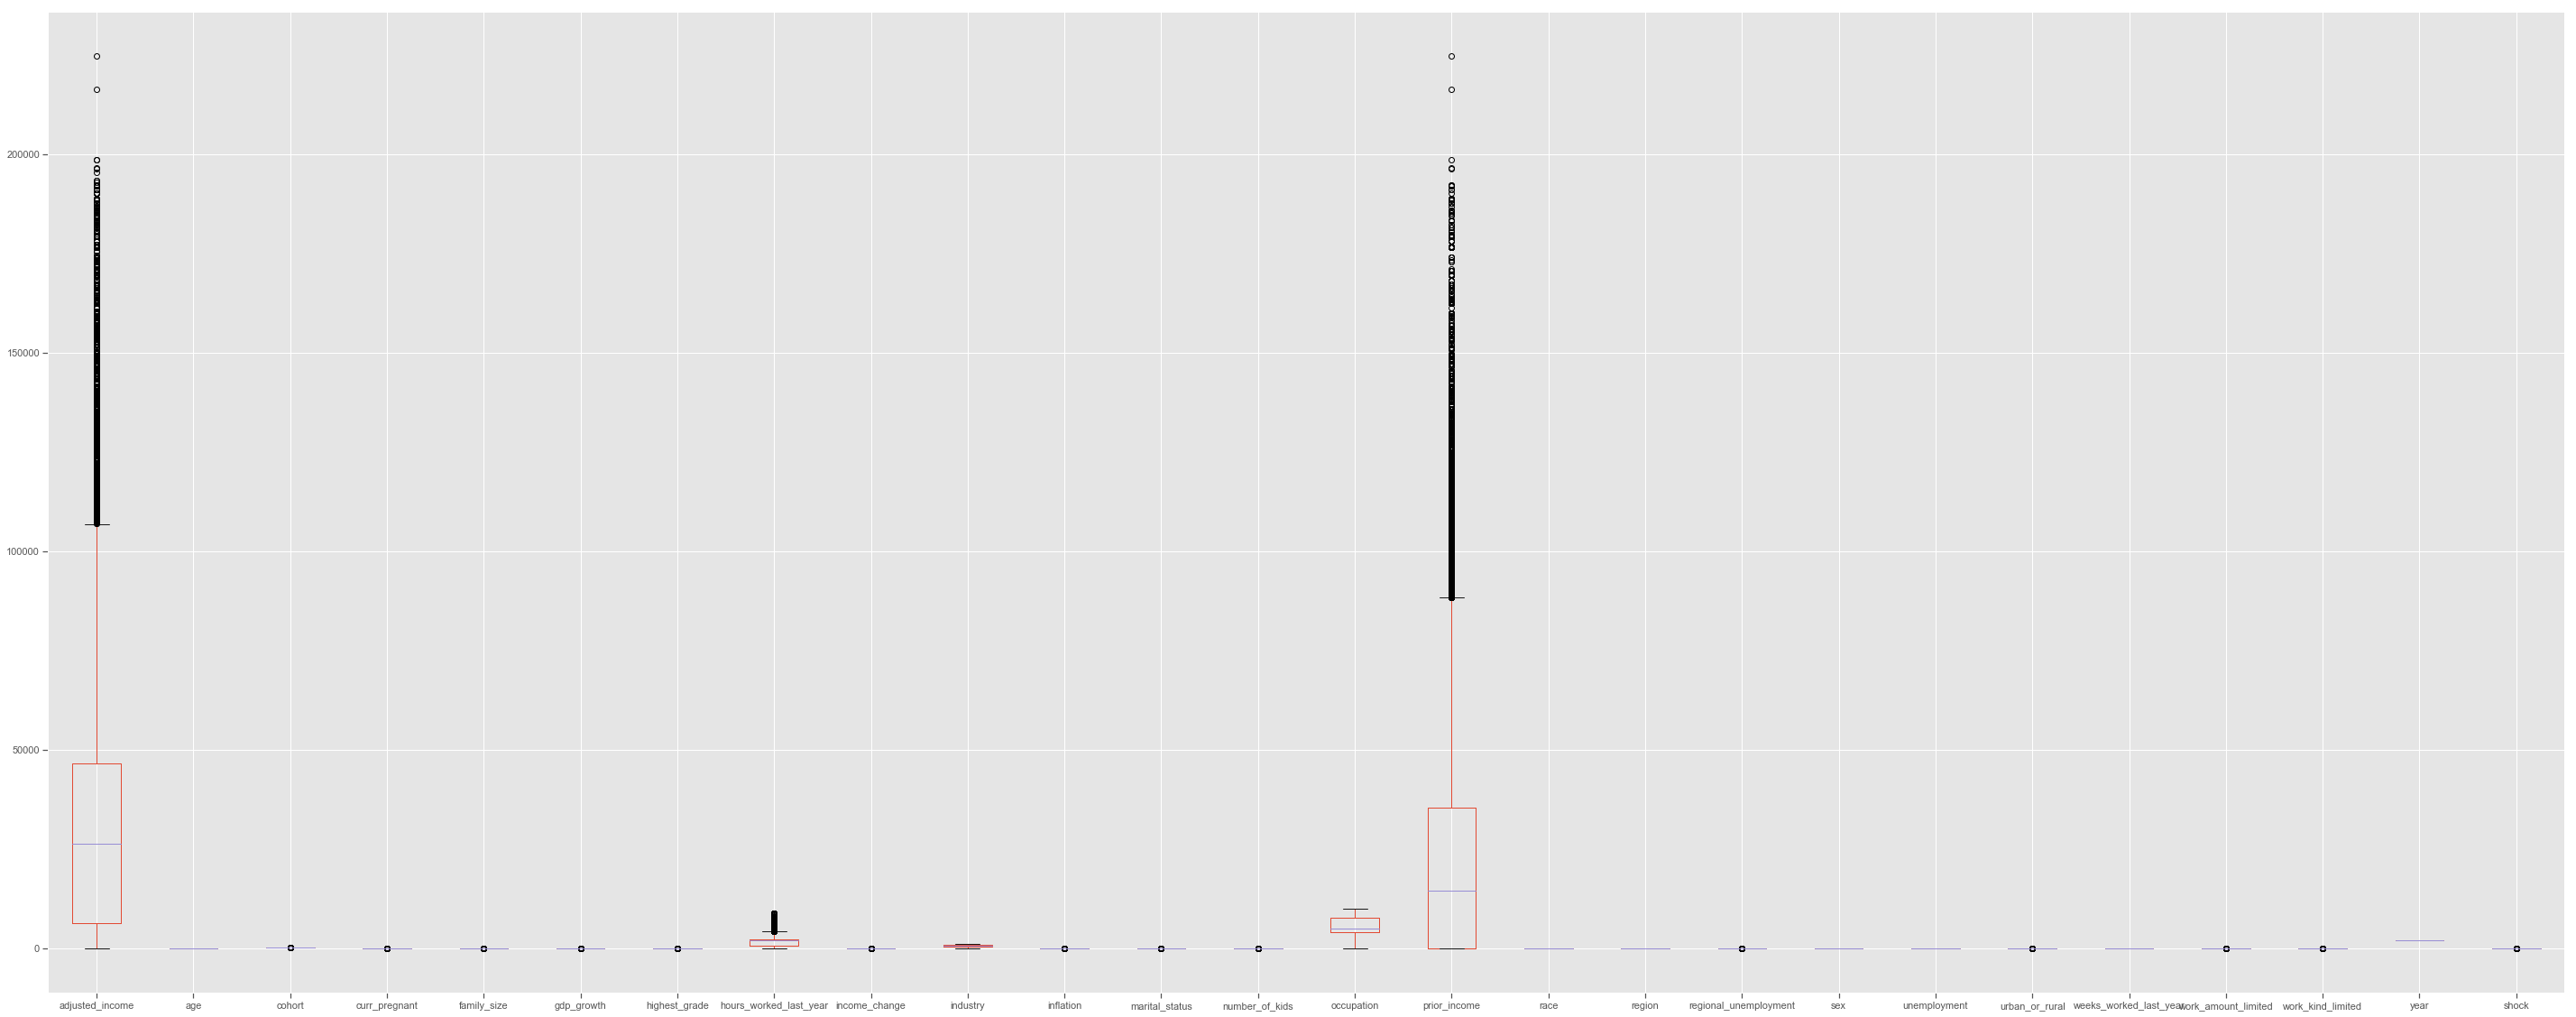

In [5]:
matplotlib.style.use('ggplot')
merged_data[original_variables].plot(kind='box',figsize=(50,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024124BCC390>,
      dtype=object)

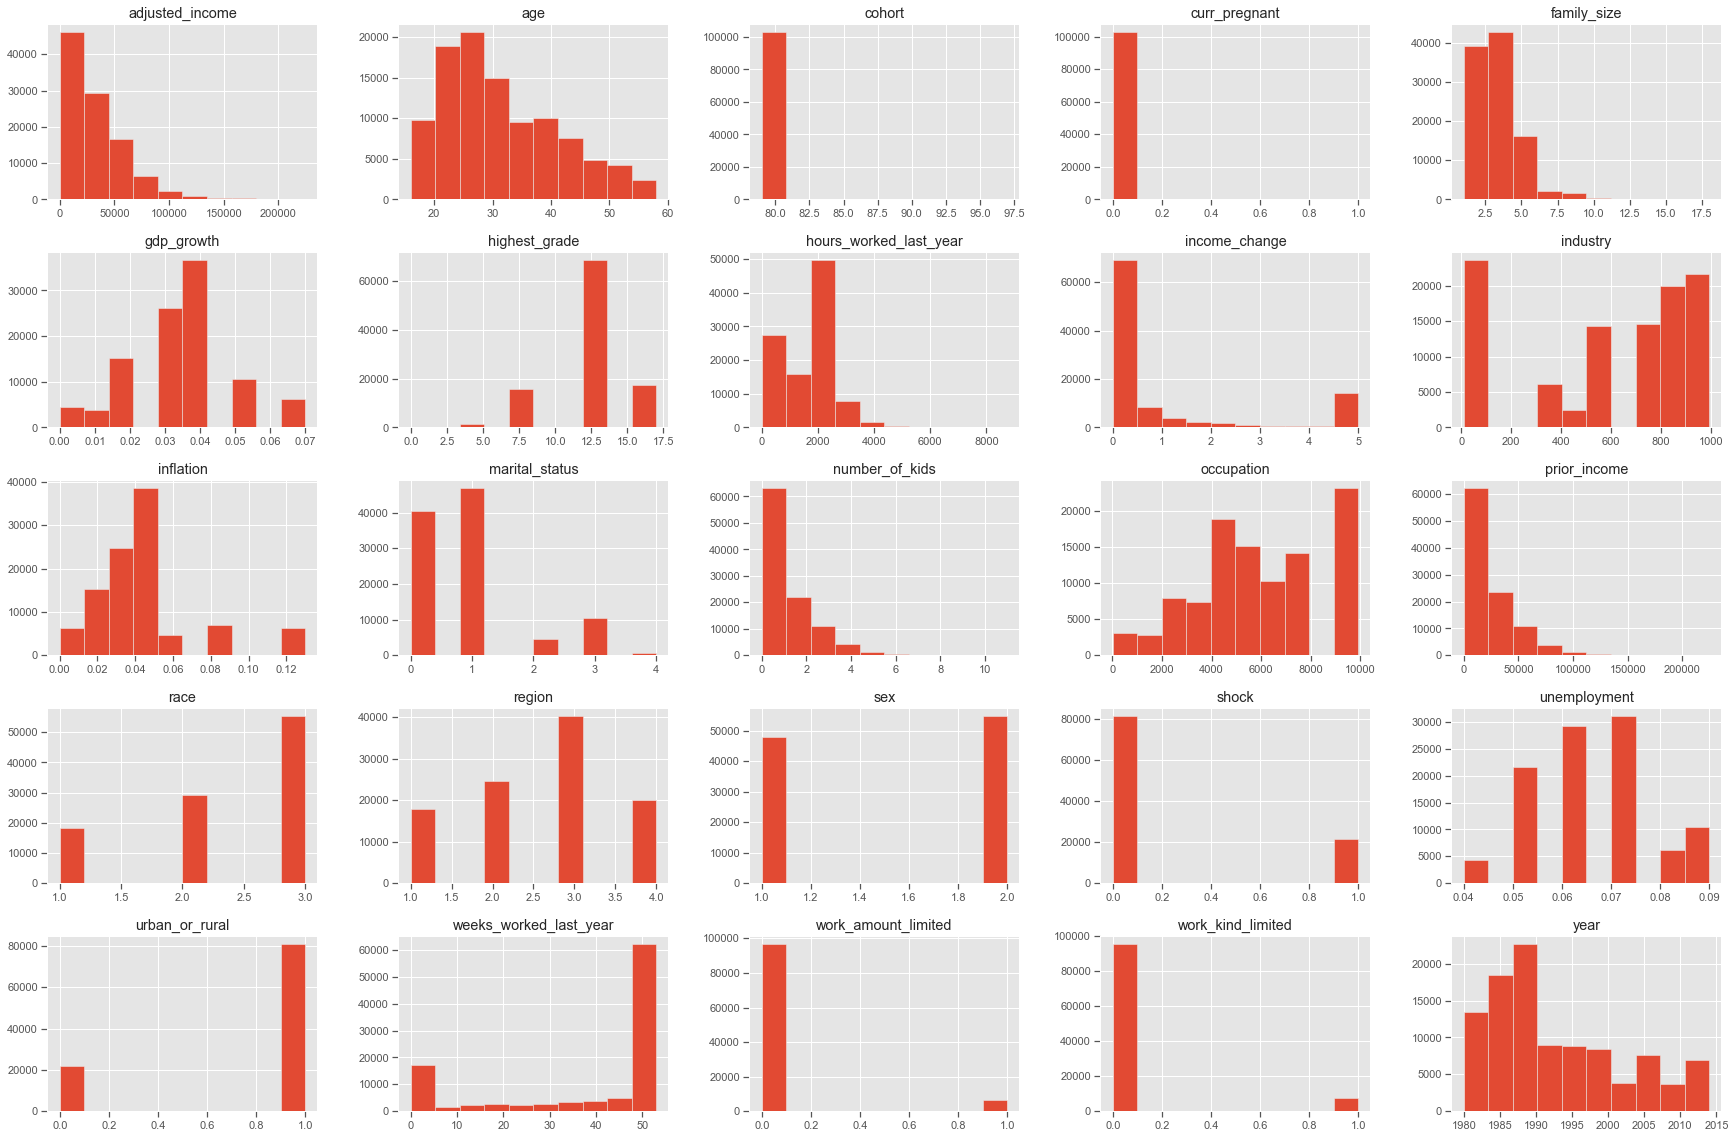

In [6]:
#all instances
merged_data[original_variables].hist(figsize=(30,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000241276CC860>,
      dtype=object)

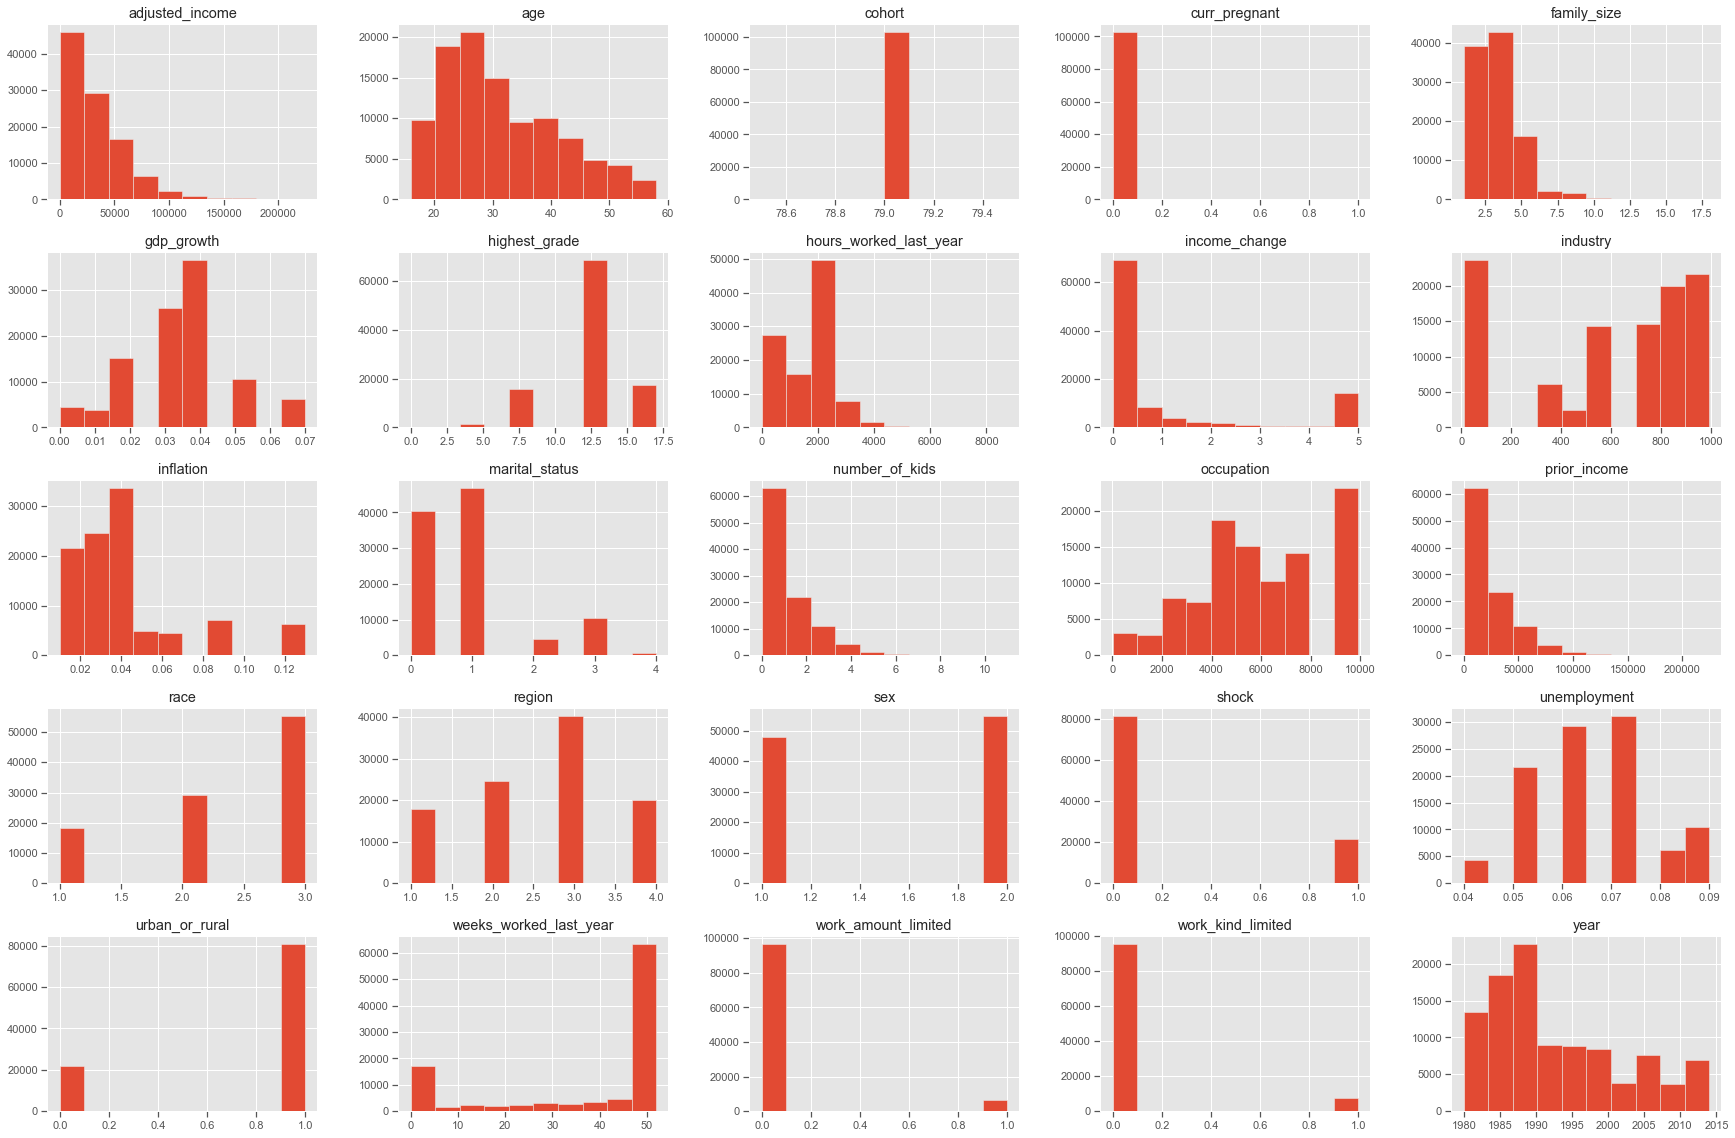

In [7]:
#all non-negative instances
merged_data_1[original_variables].hist(figsize=(30,20))

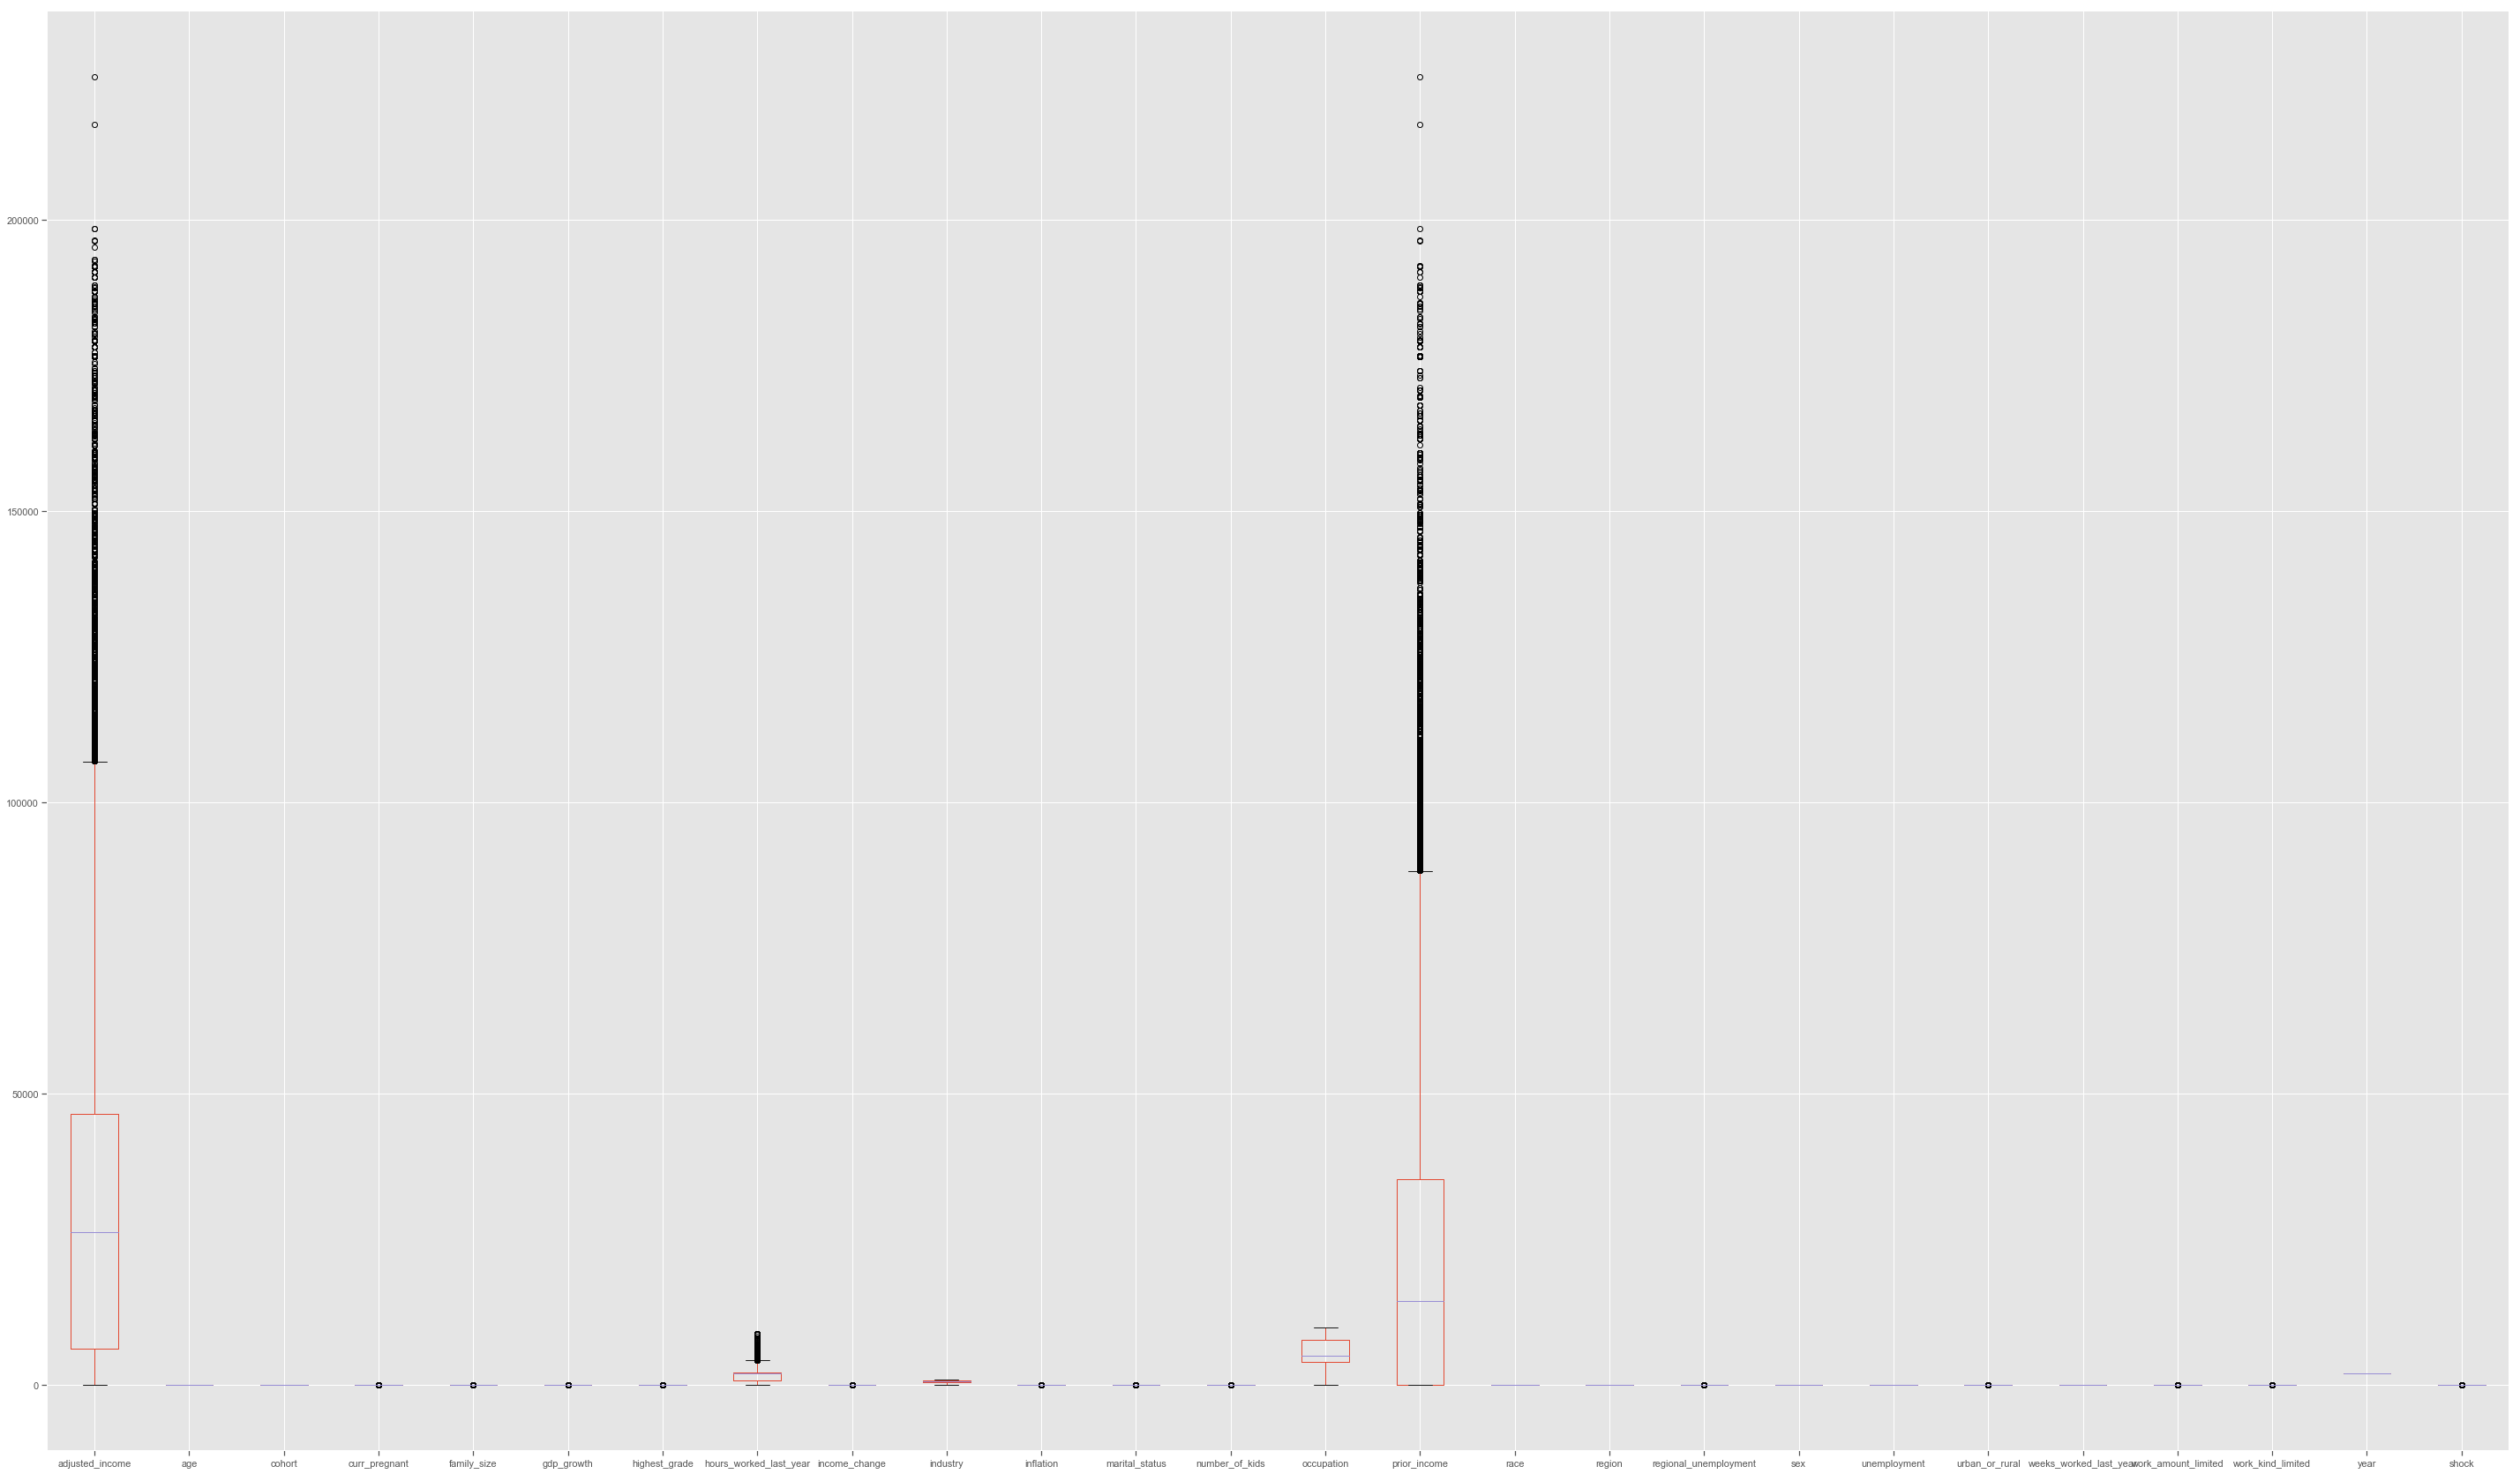

In [8]:
merged_data_1[original_variables].plot(kind='box',figsize=(50,30))

In [9]:
merged_data_1.columns

Index(['adjusted_income', 'age', 'case_id', 'cohort', 'curr_pregnant',
       'family_size', 'gdp_growth', 'highest_grade', 'highest_grade_0',
       'highest_grade_12', 'highest_grade_13', 'highest_grade_16',
       'highest_grade_17', 'highest_grade_5', 'highest_grade_8',
       'hours_worked_last_year', 'income_change', 'industry', 'industry_10',
       'industry_100', 'industry_40', 'industry_400', 'industry_500',
       'industry_580', 'industry_60', 'industry_700', 'industry_721',
       'industry_761', 'industry_800', 'industry_812', 'industry_900',
       'industry_940', 'industry_992', 'inflation', 'marital_status',
       'marital_status_0', 'marital_status_1', 'marital_status_2',
       'marital_status_3', 'marital_status_4', 'number_of_kids', 'occupation',
       'occupation_10', 'occupation_1000', 'occupation_1300',
       'occupation_1550', 'occupation_1600', 'occupation_2000',
       'occupation_2100', 'occupation_2200', 'occupation_2600',
       'occupation_3000', 'occu

 let's chart for all data across both data sets.

In [10]:
def chart_data(data):

    # First, chart all the columns that don't require any bucketing of various values
    columns = ["sex", "race", "year", "curr_pregnant", "age", "marital_status", "inflation", "unemployment", "work_kind_limited", "work_amount_limited", "urban_or_rural", "region"]

    for column in columns:
        x_vals = []
        y_vals = [] 
        for key, value in data[column].value_counts().sort_index().items():
            if key < 0:
                continue
            shocks = len(data[(data['shock'] == 1) & (data[column] == key)])
            non_shocks = len(data[(data['shock'] == 0) & (data[column] == key)])
            if shocks > 0 or non_shocks > 0:
                x_vals.append(key)
                y_vals.append(shocks / (shocks + non_shocks))
        df = pd.DataFrame({'Value': x_vals, 'Shock Percentage': y_vals})
        ax = df.plot.bar(x='Value', y='Shock Percentage', title=column, legend=False, colormap='Pastel1')

    # For columns that require bucketing, identify the appropriate buckets to use.
    bucketed_columns = {"adjusted_income": 
                            [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 
                             100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000],
                        "family_size":
                            [1, 2, 3, 4, 5],
                        "highest_grade":
                            [0, 12, 16, 20],
                        "occupation":
                            [0, 500, 800, 1000, 1300, 1550, 1600, 2000, 2100, 2200, 2600, 3000, 3600, 3700, 4000, 4200, 4300, 4700, 5000, 6000, 6200, 6800, 7000, 7700, 9000, 9800, 9900],
                        "industry":
                            [0, 10, 40, 60, 100, 132, 151, 160, 170, 180, 200, 210, 220, 220, 230, 250, 270, 310, 340, 351, 371, 400, 440, 450, 500, 540, 580, 700, 720, 761, 800, 812, 900, 940, 992],
                       "hours_worked_last_year":
                            [0, 1000,2000,3000,4000,5000,6000],
                       'weeks_worked_last_year':
                       [0,10,20,30,40,50,60]}

    for column, val_list in bucketed_columns.items():
        x_vals = []
        y_vals = [] 
        for index, value in enumerate(val_list):
            if index < (len(val_list) - 1):
                shocks = len(data[(data['shock'] == 1) & (data[column] >= value) & (data[column] < val_list[index + 1])])
                non_shocks = len(data[(data['shock'] == 0) & (data[column] >= value) & (data[column] < val_list[index + 1])])
            else:
                shocks = len(data[(data['shock'] == 1) & (data[column] >= value)])
                non_shocks = len(data[(data['shock'] == 0) & (data[column] >= value)])        
            if shocks > 0 or non_shocks > 0:
                x_vals.append(value)
                y_vals.append(shocks / (shocks + non_shocks))
        df = pd.DataFrame({'Value': x_vals, 'Shock Percentage': y_vals})
        ax = df.plot.bar(x='Value', y='Shock Percentage', title=column, legend=False, colormap='Pastel1')

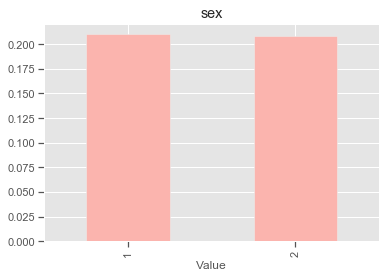

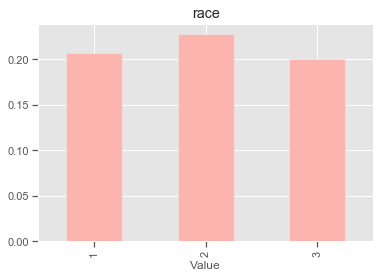

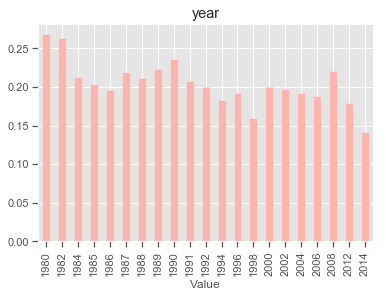

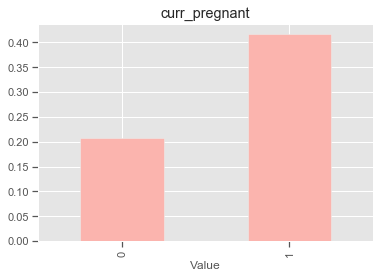

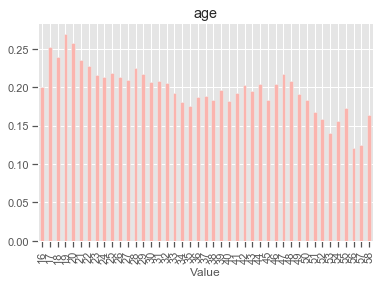

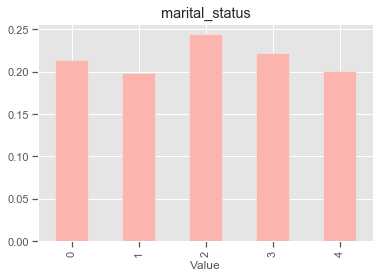

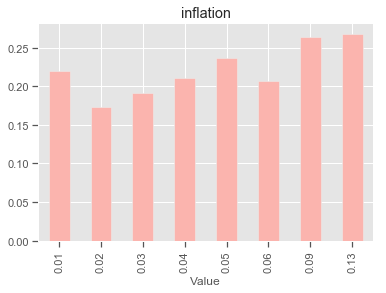

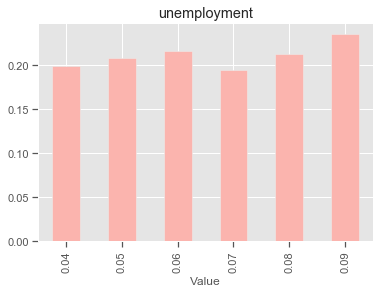

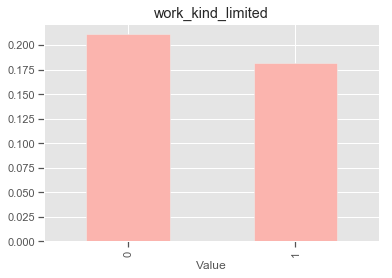

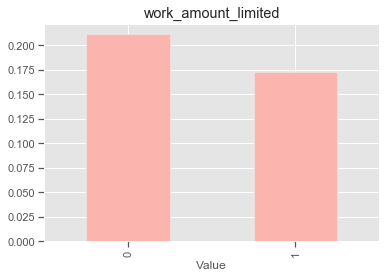

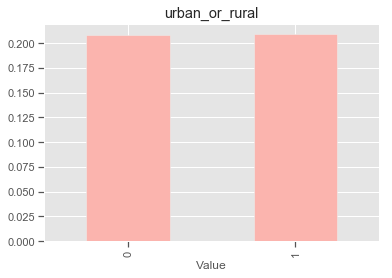

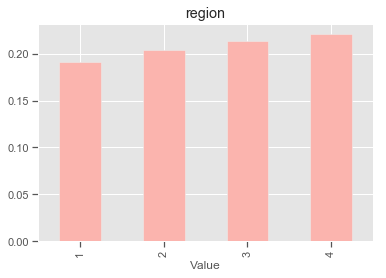

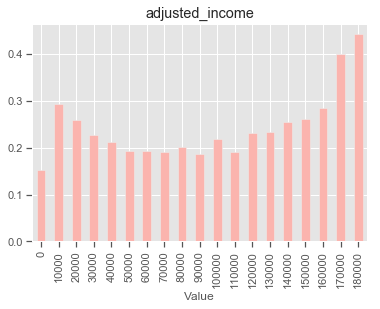

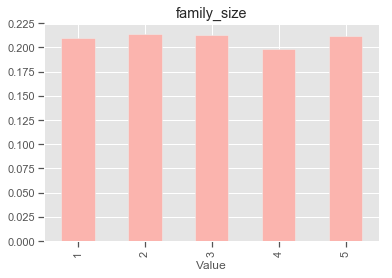

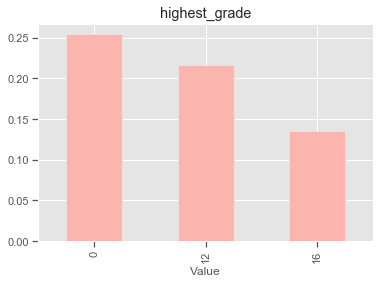

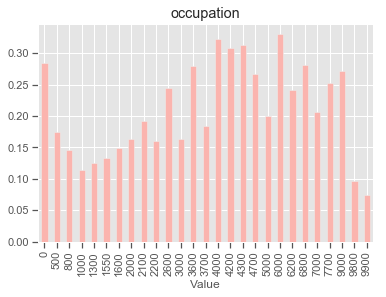

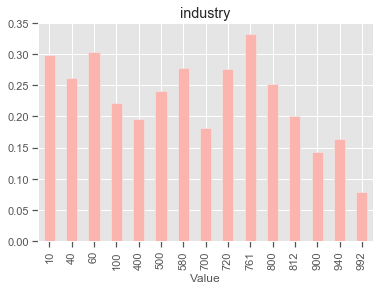

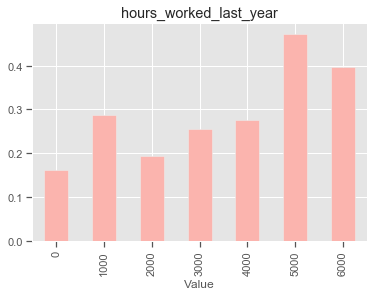

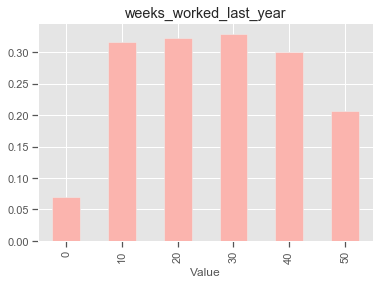

In [11]:
chart_data(merged_data_1[original_variables])

# Feature Analysis, Feature Selection and Engineering

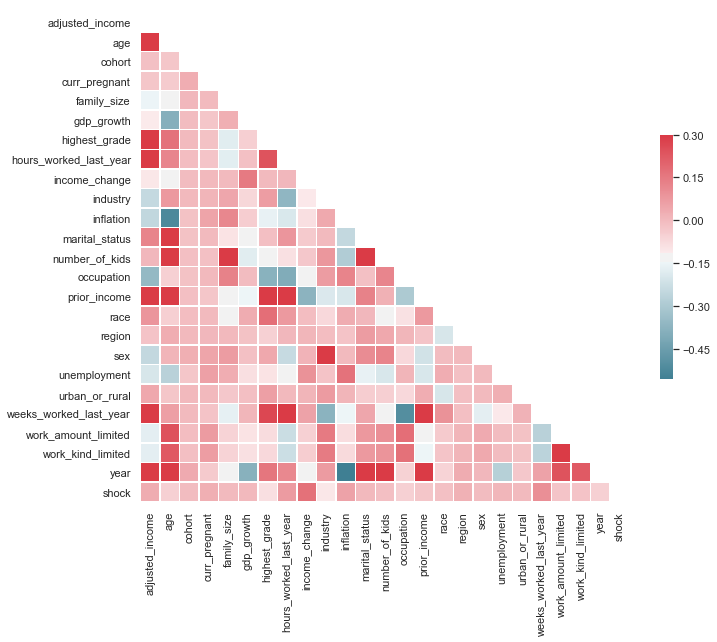

In [12]:
from string import ascii_letters as letters
sns.set(style="white")
sns.set_palette("Paired")
# Compute the correlation matrix
corr = merged_data[original_variables].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=1, yticklabels=1,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

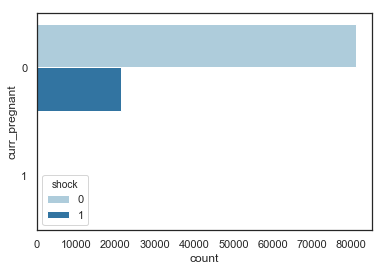

In [13]:
cp = sns.countplot(y='curr_pregnant', hue='shock', data=merged_data_1[original_variables],)

C:\Users\pqy94\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


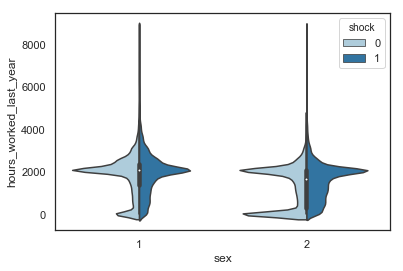

In [14]:
sns.violinplot(x="sex", y='hours_worked_last_year', hue='shock',split=True, data=merged_data_1[original_variables],)

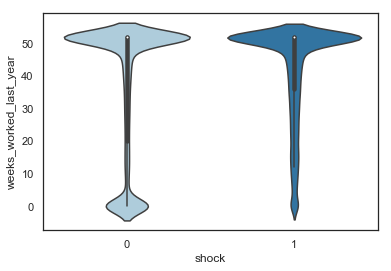

In [15]:
ai = sns.violinplot(x="shock", y='weeks_worked_last_year', data=merged_data_1[original_variables],)

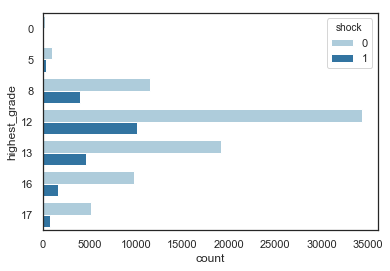

In [16]:
hg = sns.countplot(y='highest_grade', hue='shock', data=merged_data_1[original_variables],)

C:\Users\pqy94\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\pqy94\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\pqy94\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


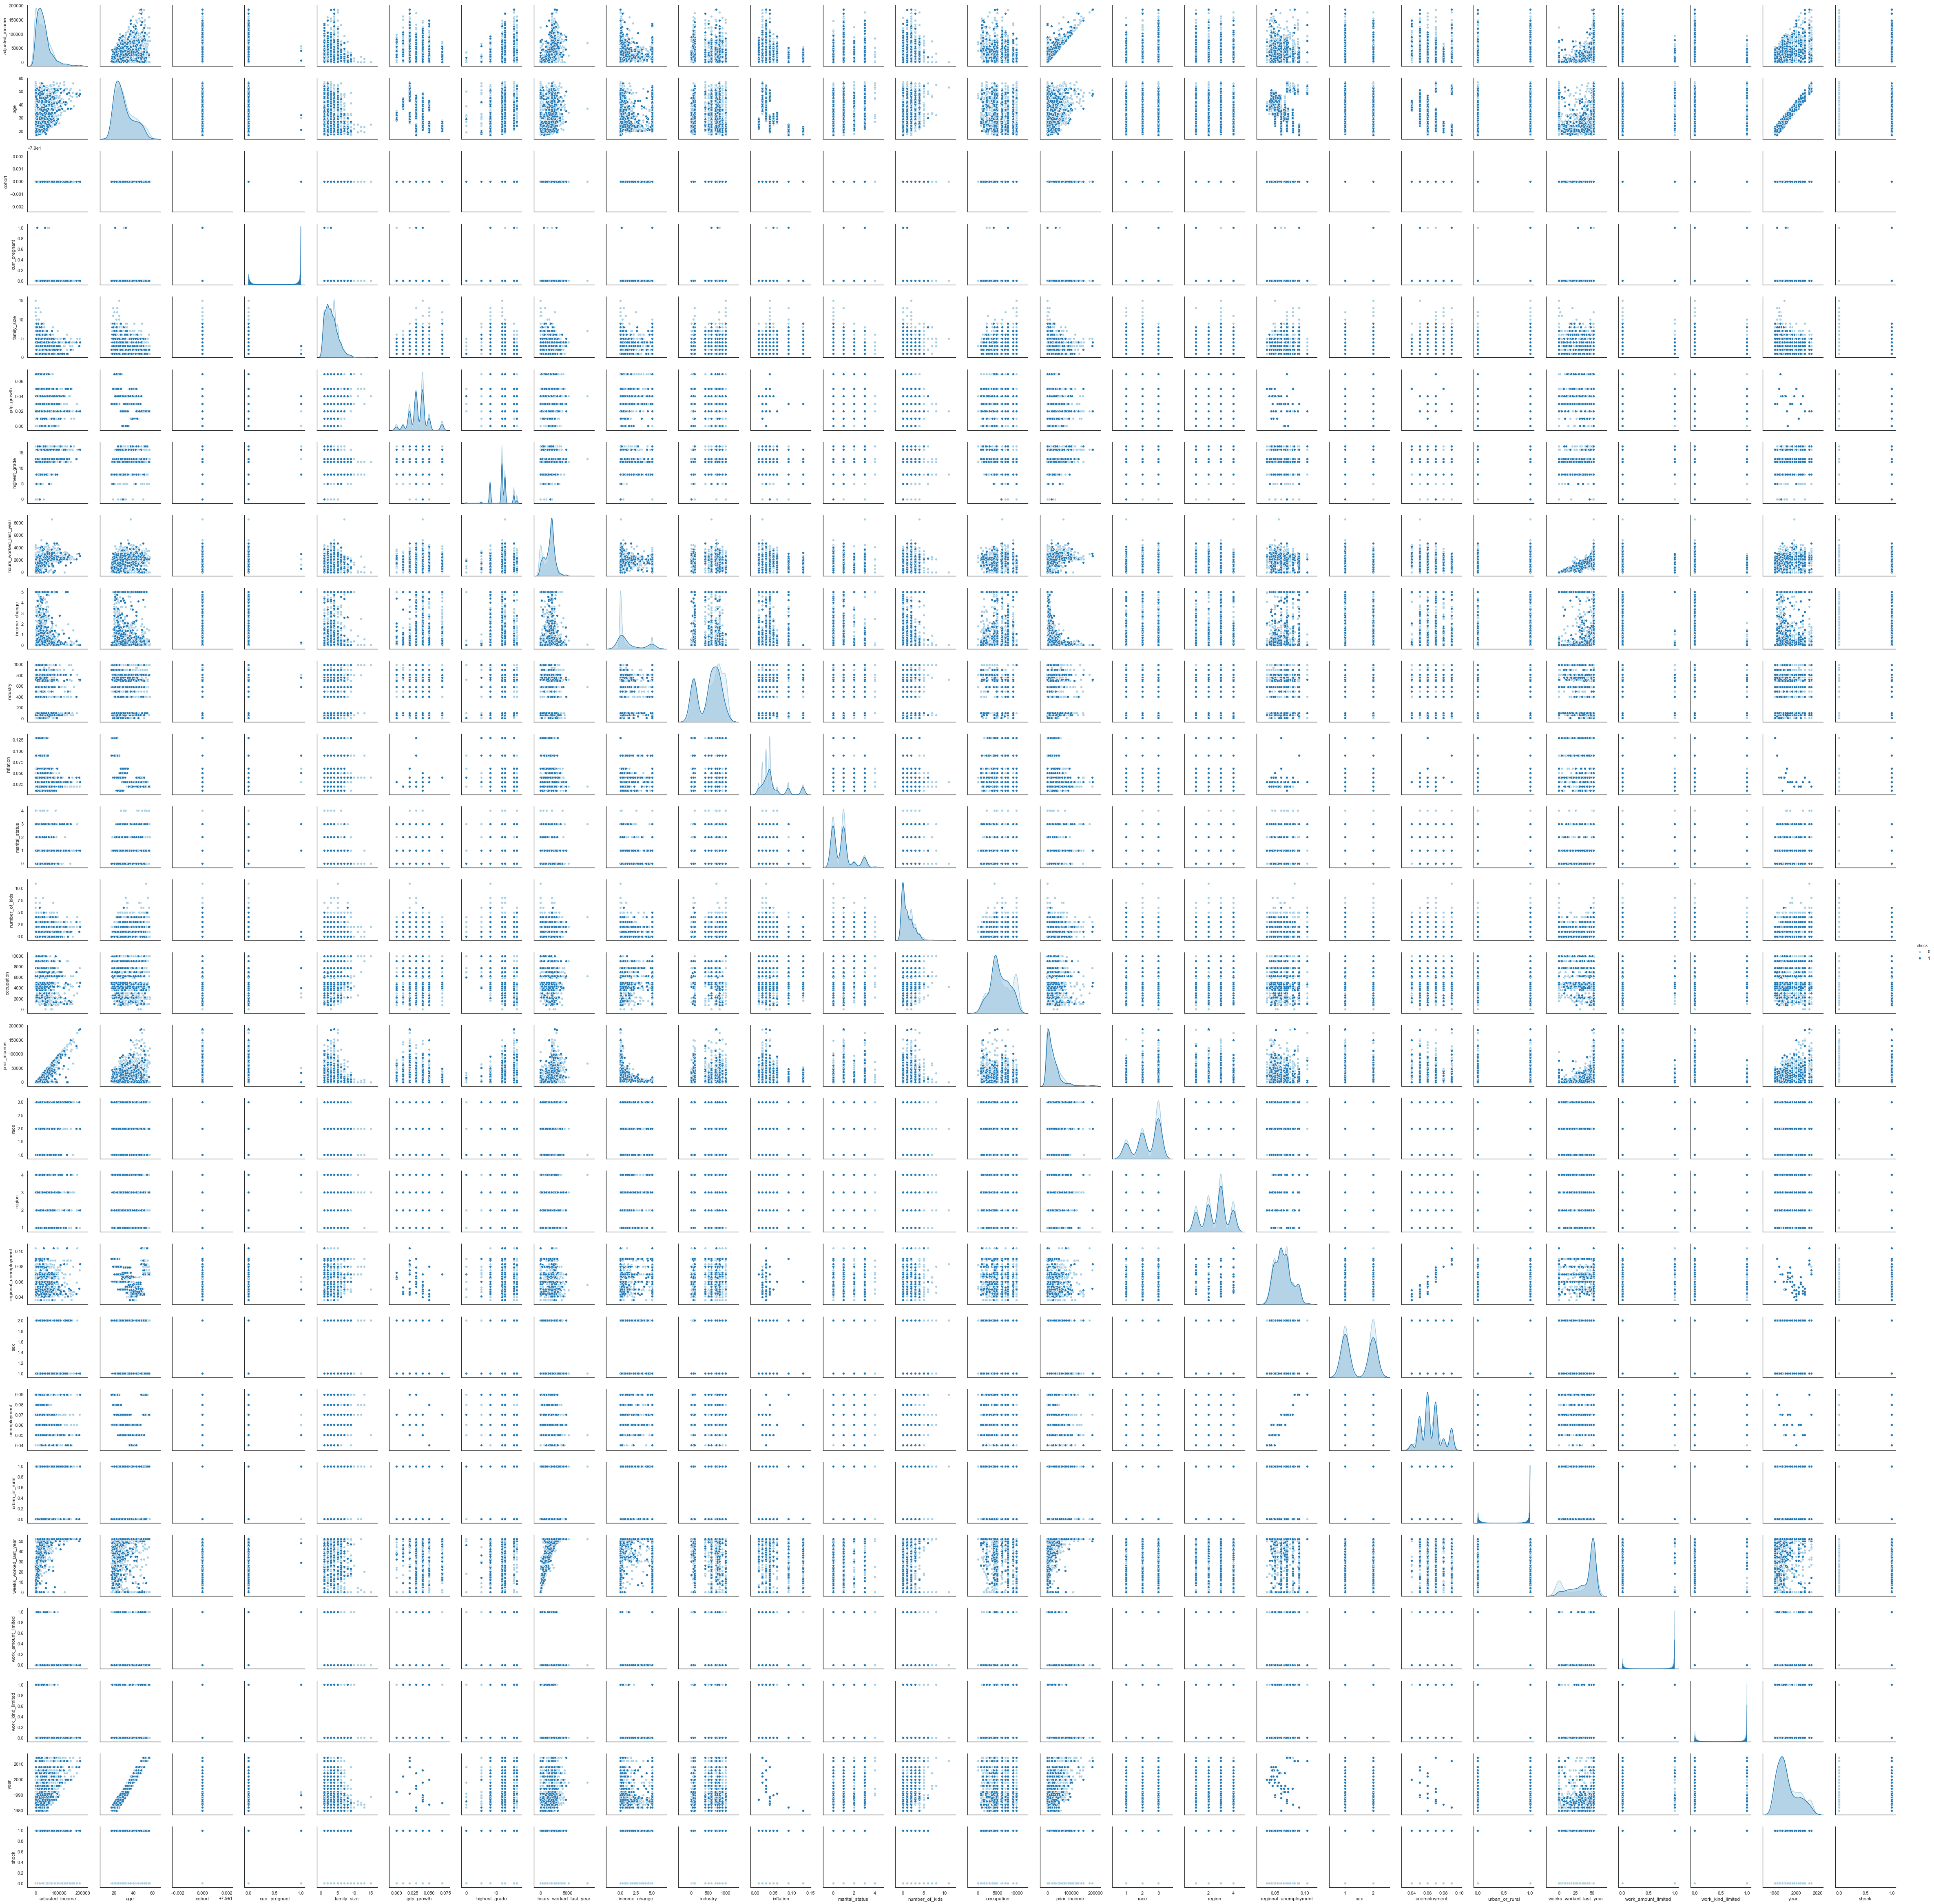

In [17]:
g = sns.pairplot(merged_data_1[original_variables].sample(2000), hue='shock', dropna=True)

## Hypothesis Testing

In [18]:
import nlsy
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
from scipy import stats

sns.set(style="ticks", color_codes=True)
%matplotlib inline

NLSY_db = nlsy.NLSY_database("data.db")
(cohort_79, cohort_97) = NLSY_db.cohorts
#create a column to indicate which cohort each instance belongs to.
c79=cohort_79.data(impute_values=False)
c97=cohort_97.data(impute_values=False)
c79['cohort']=79
c97["cohort"]=97
merged_data = pd.concat([c79, c97])
#drop all negative responses and N/A
merged_data_1=merged_data[merged_data[merged_data.columns]>=0].dropna()

C:\Users\pqy94\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [19]:
merged_data_1.columns

Index(['adjusted_income', 'age', 'case_id', 'cohort', 'curr_pregnant',
       'family_size', 'gdp_growth', 'highest_grade', 'highest_grade_0',
       'highest_grade_12', 'highest_grade_13', 'highest_grade_16',
       'highest_grade_17', 'highest_grade_5', 'highest_grade_8',
       'hours_worked_last_year', 'income_change', 'industry', 'industry_10',
       'industry_100', 'industry_40', 'industry_400', 'industry_500',
       'industry_580', 'industry_60', 'industry_700', 'industry_721',
       'industry_761', 'industry_800', 'industry_812', 'industry_900',
       'industry_940', 'industry_992', 'inflation', 'marital_status',
       'marital_status_0', 'marital_status_1', 'marital_status_2',
       'marital_status_3', 'marital_status_4', 'number_of_kids', 'occupation',
       'occupation_10', 'occupation_1000', 'occupation_1300',
       'occupation_1550', 'occupation_1600', 'occupation_2000',
       'occupation_2100', 'occupation_2200', 'occupation_2600',
       'occupation_3000', 'occu

### Two-Sample T-test for Interval Variables

In [20]:
#split the data into two samples, one with income shock and one without 
w_shock=merged_data_1[merged_data_1["shock"]==1]
wo_shock=merged_data_1[merged_data_1["shock"]==0]
#all interval variables
IV=['adjusted_income', 'age', 'family_size', 'gdp_growth', 'hours_worked_last_year', 'income_change', 'prior_income',
              'regional_unemployment', 'unemployment', 'weeks_worked_last_year','inflation','number_of_kids']

In [21]:
#define ttest function
def ttest_shock(variable_name):
    t,p=stats.ttest_ind(w_shock[variable_name].values,wo_shock[variable_name].values)
    return p

In [22]:
Hypothesis_Testing=[]
for iv in IV:
   p = ttest_shock(iv)
   Hypothesis_Testing.append((iv,p))
   if p<=0.05:
    print(f'P Value for {iv} is {p:0.3f}, and the null hypothesis is rejected')
   else:
    print(f'P Value for {iv} is {p:0.3f}, and the null hypothesis is not rejected')


P Value for adjusted_income is 0.000, and the null hypothesis is rejected
P Value for age is 0.000, and the null hypothesis is rejected
P Value for family_size is 0.859, and the null hypothesis is not rejected
P Value for gdp_growth is 0.161, and the null hypothesis is not rejected
P Value for hours_worked_last_year is 0.000, and the null hypothesis is rejected
P Value for income_change is 0.000, and the null hypothesis is rejected
P Value for prior_income is 0.000, and the null hypothesis is rejected
P Value for regional_unemployment is 0.000, and the null hypothesis is rejected
P Value for unemployment is 0.001, and the null hypothesis is rejected
P Value for weeks_worked_last_year is 0.000, and the null hypothesis is rejected
P Value for inflation is 0.000, and the null hypothesis is rejected
P Value for number_of_kids is 0.005, and the null hypothesis is rejected


### Chi_sqaure Test for Catogorical Variables

In [23]:
#chi_sqaure hypothesis testing
def contingency_table(db, variable_2):
    table= pd.crosstab(db['shock'],db[variable_2],margins = True)
    return table

def translate_chi2(chi2_results):
    p_value =chi2_results[1]
    df = chi2_results[2]
    return p,df

def chi2_results(db, variable_2):
    ct=contingency_table(db,variable_2)
    f_obs = np.array([ct.iloc[0][0:ct.shape[1]],
                      ct.iloc[1][0:ct.shape[1]]])
    results = stats.chi2_contingency(f_obs)
    p,df=translate_chi2(results)
    if p>=0.05:
        print(f'P-value of the chi2_test for {variable_2} is {p:0.3f},therefore, we failed to reject the null Hypothesis.')
    else:
        print(f'P-value of the chi2_test for {variable_2} is {p:0.3f},therefore, we rejected the null Hypothesis.')
    return 
    #translate_chi2(results)

In [24]:
CV=['cohort', 'curr_pregnant','highest_grade','industry', 'marital_status', 'occupation',
             'race', 'region', 'sex', 'work_amount_limited',"urban_or_rural",
       'work_kind_limited']

In [25]:
for cv in CV:
    chi2_results(merged_data_1,cv)

P-value of the chi2_test for cohort is 0.005,therefore, we rejected the null Hypothesis.
P-value of the chi2_test for curr_pregnant is 0.005,therefore, we rejected the null Hypothesis.
P-value of the chi2_test for highest_grade is 0.005,therefore, we rejected the null Hypothesis.
P-value of the chi2_test for industry is 0.005,therefore, we rejected the null Hypothesis.
P-value of the chi2_test for marital_status is 0.005,therefore, we rejected the null Hypothesis.
P-value of the chi2_test for occupation is 0.005,therefore, we rejected the null Hypothesis.
P-value of the chi2_test for race is 0.005,therefore, we rejected the null Hypothesis.
P-value of the chi2_test for region is 0.005,therefore, we rejected the null Hypothesis.
P-value of the chi2_test for sex is 0.005,therefore, we rejected the null Hypothesis.
P-value of the chi2_test for work_amount_limited is 0.005,therefore, we rejected the null Hypothesis.
P-value of the chi2_test for urban_or_rural is 0.005,therefore, we rejecte